In [34]:
import os
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)


def walkfile(file):
    for dirname, _, filenames in os.walk(file):
        for filename in filenames:
            print(os.path.join(dirname, filename))
walkfile('.\data')

In [35]:
import warnings
warnings.filterwarnings('ignore')


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [37]:
df = pd.read_csv(
    '../data/data_cleaned_2021.csv')


In [39]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [41]:
df['Sector'].unique()


array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Telecommunications', '-1', 'Manufacturing', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [42]:
df['job_title_sim'].unique()


array(['data scientist', 'other scientist', 'analyst', 'data engineer',
       'data analitics', 'na', 'data modeler',
       'Data scientist project manager', 'machine learning engineer',
       'director'], dtype=object)

In [43]:
df1 = df.iloc[:, [19, 12, 39, 23, 24, 25, 26, 27,
                  28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]]

In [44]:
df1.head()

,Avg Salary(K),Sector,job_title_sim,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,72.0,Aerospace & Defense,data scientist,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,87.5,Health Care,data scientist,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,85.0,Business Services,data scientist,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,76.5,"Oil, Gas, Energy & Utilities",data scientist,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,114.5,Business Services,data scientist,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

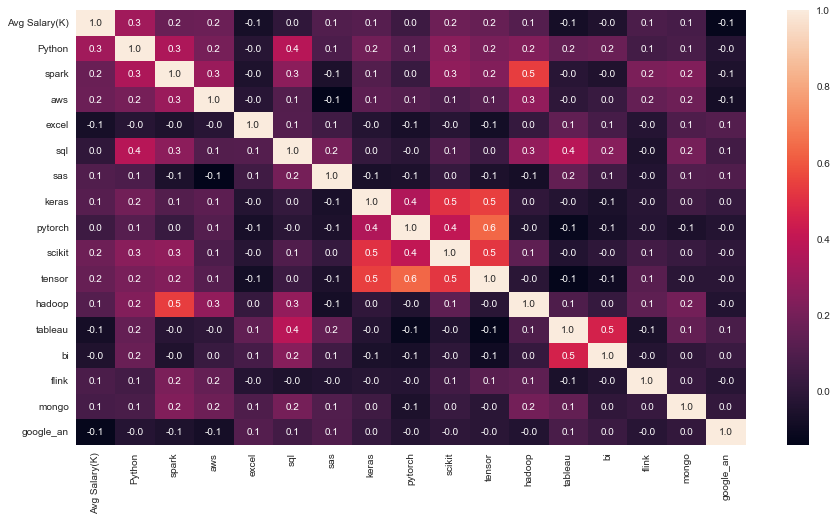

In [45]:
plt.figure(figsize = (15,8))
sns.heatmap(df1.corr(),annot=True, fmt="1.1f")

<AxesSubplot:xlabel='Sector'>

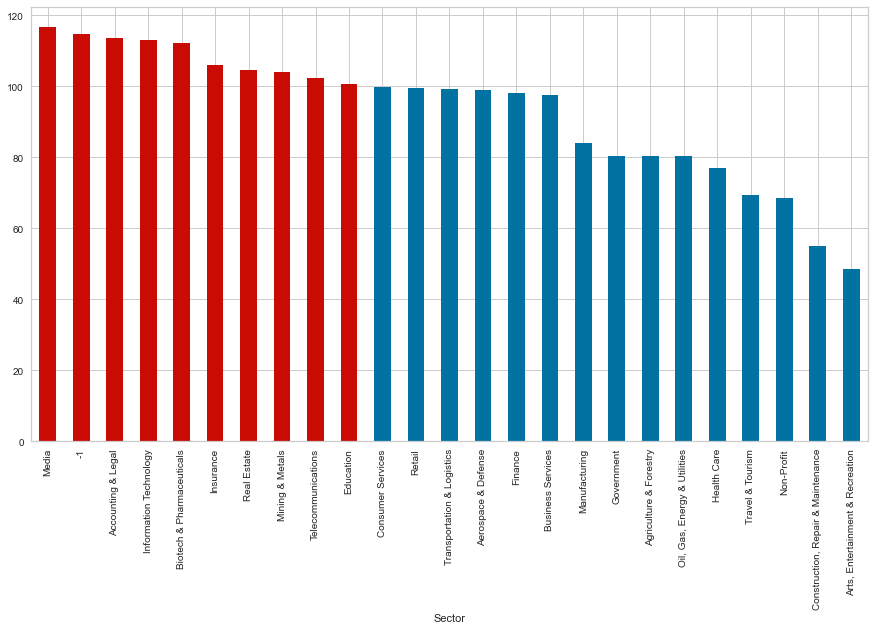

In [46]:
df2 = df.groupby('Sector')['Avg Salary(K)'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
color = [('b' if i < 100 else 'r') for i in df2]
df2.plot.bar(color=color)


<AxesSubplot:xlabel='job_title_sim'>

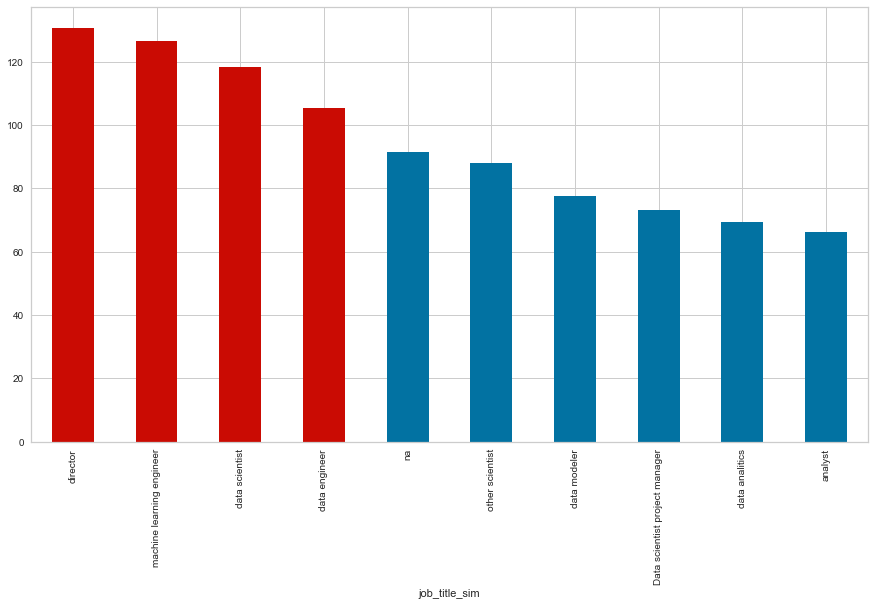

In [47]:
df3 = df.groupby('job_title_sim')[
    'Avg Salary(K)'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
color = [('b' if i < 100 else 'r') for i in df3]
df3.plot.bar(color=color)


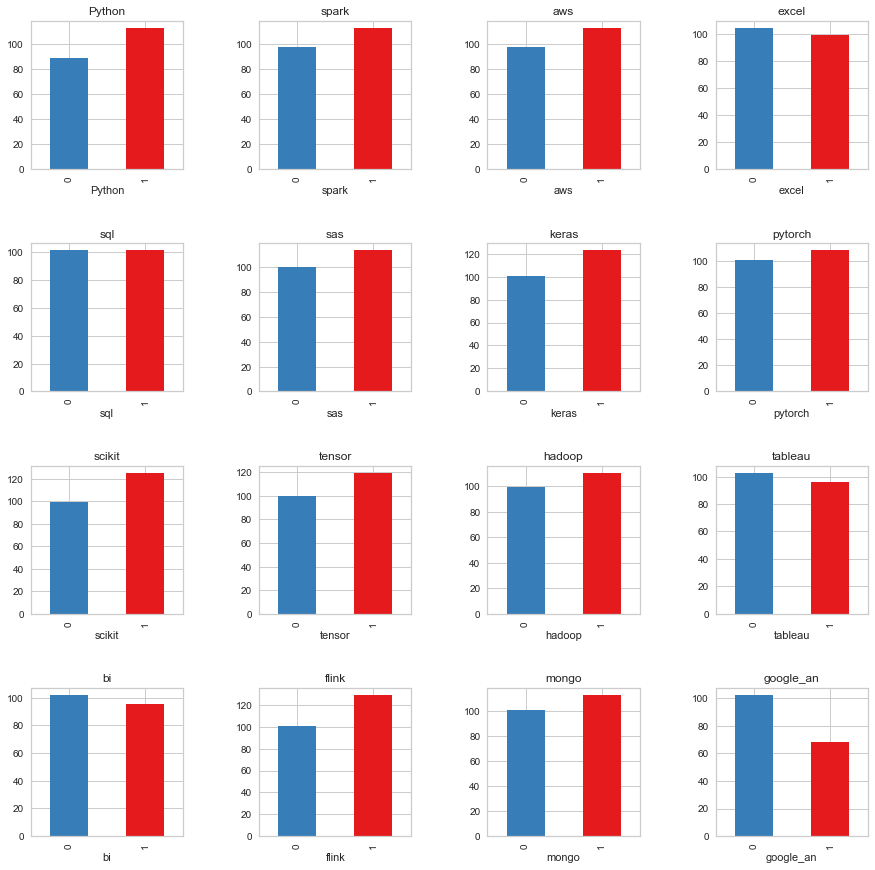

In [48]:
plt.figure(figsize=(15,15))
plt.subplot(441)
colorlist = ['#377eb8','#e41a1c']
df.groupby('Python')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('Python')
plt.subplot(442)
df.groupby('spark')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('spark')
plt.subplot(443)
df.groupby('aws')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('aws')
plt.subplot(444)
df.groupby('excel')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('excel')
plt.subplot(445)
df.groupby('sql')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('sql')
plt.subplot(446)
df.groupby('sas')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('sas')
plt.subplot(447)
df.groupby('keras')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('keras')
plt.subplot(448)
df.groupby('pytorch')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('pytorch')
plt.subplot(449)
df.groupby('scikit')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('scikit')
plt.subplot(4,4,10)
df.groupby('tensor')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('tensor')
plt.subplot(4,4,11)
df.groupby('hadoop')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('hadoop')
plt.subplot(4, 4, 12)
df.groupby('tableau')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('tableau')
plt.subplot(4, 4, 13)
df.groupby('bi')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('bi')
plt.subplot(4, 4, 14)
df.groupby('flink')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('flink')
plt.subplot(4, 4, 15)
df.groupby('mongo')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('mongo')
plt.subplot(4, 4, 16)
df.groupby('google_an')['Avg Salary(K)'].mean().plot.bar(color=colorlist)
plt.title('google_an')
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)


In [49]:
def rank(ex):
    if ex >= 100:
        return 1
    else:
        return 0


In [50]:
df1.loc[:, 'rank'] = df1.loc[:, 'Avg Salary(K)'].apply(rank)
df1


,Avg Salary(K),Sector,job_title_sim,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,rank
0,72.0,Aerospace & Defense,data scientist,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0
1,87.5,Health Care,data scientist,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,85.0,Business Services,data scientist,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,76.5,"Oil, Gas, Energy & Utilities",data scientist,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,114.5,Business Services,data scientist,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,Biotech & Pharmaceuticals,other scientist,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
738,102.5,Information Technology,data engineer,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
739,73.5,Education,other scientist,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
740,127.5,Business Services,data scientist,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
df4=df1.drop(['Avg Salary(K)','Sector','job_title_sim'],axis=1)

In [52]:
from pycaret.classification import *

In [53]:
exp_clf = setup(df4, target = 'rank',silent=True,session_id=1)

,Description,Value
0,session_id,1
1,Target,rank
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(742, 17)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [54]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6877,0.7245,0.6117,0.6909,0.6451,0.3685,0.3741,0.1480
et,Extra Trees Classifier,0.6724,0.7250,0.5540,0.6905,0.6107,0.3341,0.3440,0.1380
gbc,Gradient Boosting Classifier,0.6627,0.7107,0.5447,0.6825,0.5981,0.3137,0.3249,0.0150
dt,Decision Tree Classifier,0.6570,0.6984,0.5333,0.6693,0.5893,0.3023,0.3117,0.0050
lightgbm,Light Gradient Boosting Machine,0.6492,0.7061,0.5317,0.6562,0.5790,0.2855,0.2951,0.0090
ridge,Ridge Classifier,0.6320,0.0000,0.5082,0.6337,0.5598,0.2511,0.2575,0.0050
lda,Linear Discriminant Analysis,0.6243,0.6841,0.4877,0.6272,0.5449,0.2343,0.2414,0.0050
lr,Logistic Regression,0.6224,0.6837,0.4915,0.6241,0.5452,0.2309,0.2380,0.0070
nb,Naive Bayes,0.6166,0.6655,0.2978,0.7417,0.4151,0.2005,0.2515,0.0040
knn,K Neighbors Classifier,0.6069,0.6408,0.5535,0.6155,0.5672,0.2108,0.2205,0.0290


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [55]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7500,0.7656,0.6250,0.7895,0.6977,0.4894,0.4991
1,0.7308,0.7679,0.5417,0.8125,0.6500,0.4451,0.4693
2,0.6154,0.6935,0.5417,0.5909,0.5652,0.2216,0.2222
3,0.7692,0.7954,0.7083,0.7727,0.7391,0.5329,0.5346
4,0.6346,0.6510,0.6250,0.6000,0.6122,0.2671,0.2673
5,0.6731,0.6629,0.5833,0.6667,0.6222,0.3363,0.3387
6,0.7308,0.7537,0.7917,0.6786,0.7308,0.4647,0.4702
7,0.6731,0.7704,0.5600,0.7000,0.6222,0.3403,0.3469
8,0.6731,0.7207,0.6400,0.6667,0.6531,0.3442,0.3445
9,0.6275,0.6644,0.5000,0.6316,0.5581,0.2436,0.2485


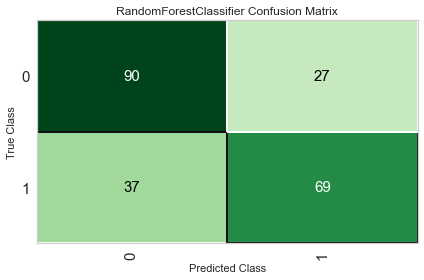

In [56]:
plot_model(rf,'confusion_matrix')

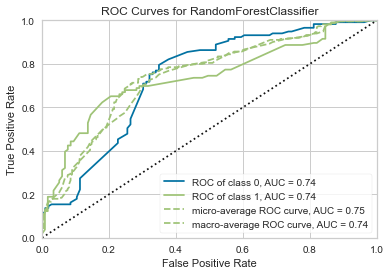

In [57]:
plot_model(rf,'auc')

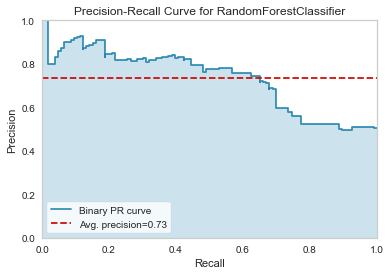

In [58]:
plot_model(rf,'pr')

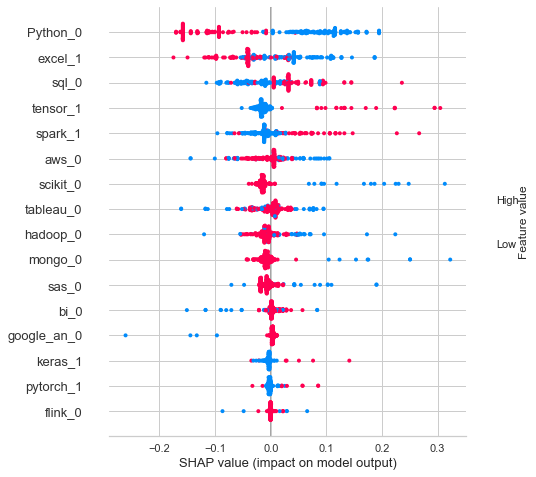

In [59]:
interpret_model(rf)

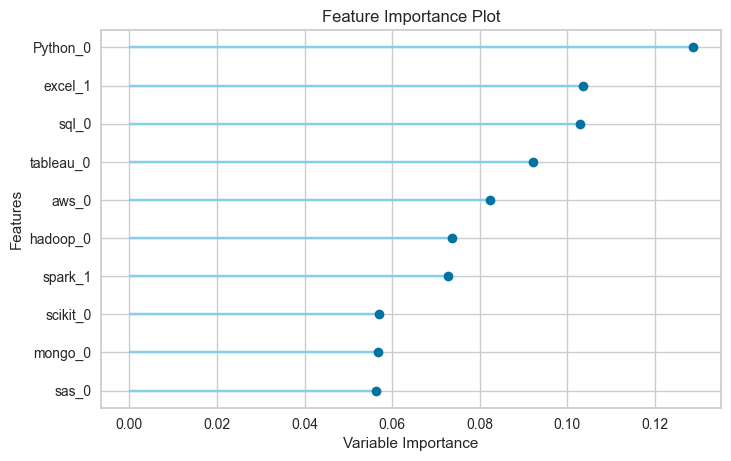

In [60]:
plot_model(rf,'feature')